# Gaussian Process Distribution of Relaxation Times. 

## In this tutorial we will show use the GP-DRT method to analyze actual experimental data

The impedance data in the csv file named `EIS_experiment.csv`. The file has three columns. The first column is the frequency, the second one the real part of the impedance. The third column is the imaginary part of impedance. To use this tutorial for your own data, we recommend the frequencies go are sorted ascendingly.

In [101]:
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
import scipy as scipy

from math import sin, cos, pi
import GP_DRT
from scipy.optimize import minimize
import pandas as pd
%matplotlib inline

## 1) Read in the impedance data from the csv file
### IMPORTANT: frequencies should be sorted ascendingly (low to high)

In [102]:
# Convert biologic EIS files into form suitable for code

data = 'R_RC_sim.csv'

df = pd.read_csv(data, header=None, encoding= 'unicode_escape')

df.rename(columns={0: 'freq', 1: 'Z_real', 2: 'Z_imag'}, inplace=True)

df.sort_values(by=['freq'], inplace=True, ascending=True)

df.to_csv("EIS_experiment.csv", index = False)


In [103]:
Z_data = pd.read_csv('EIS_experiment.csv')
freq_vec, Z_exp = Z_data['freq'].values, Z_data['Z_real'].values+1j*Z_data['Z_imag'].values

# define the frequency range
N_freqs = len(freq_vec)
xi_vec = np.log(freq_vec)
tau  = 1/freq_vec

# define the frequency range used for prediction, we choose a wider range to better display the DRT
freq_vec_star = np.logspace(-4., 6., num=101, endpoint=True)
xi_vec_star = np.log(freq_vec_star)

# finer mesh for plotting only
freq_vec_plot  = np.logspace(-4., 6., num=1001, endpoint=True)

NameError: name 'move' is not defined

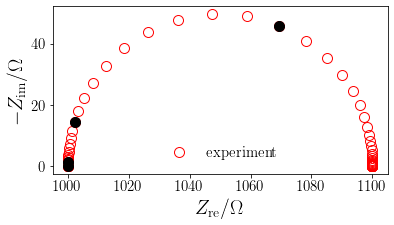

In [104]:
#Plot Nyquist plot

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# Nyquist plot of the EIS spectrum
plt.plot(np.real(Z_exp), -np.imag(Z_exp), "o", markersize=10, fillstyle='none', color="red", label="experiment")
plt.plot(np.real(Z_exp[40:80:10]), -np.imag(Z_exp[40:80:10]), 'o', markersize=10, color="black")

plt.legend(frameon=False, fontsize = 15)
plt.axis('scaled')

# this depends on the data used - if you wish to use your own data you may need to modify this
#plt.xlim(1.42, 1.52)
#plt.ylim(-0.001, 0.051)
#plt.xticks(np.arange(1.42, 1.521, 0.02))
#plt.yticks(np.arange(0.00, 0.051, 0.01))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$Z_{\rm re}/\Omega$', fontsize = 20)
plt.ylabel(r'$-Z_{\rm im}/\Omega$', fontsize = 20)

# label the frequencies - if you wish to use your own data you may need to modify this
label_index = range(40,80,10)
#move = [[-0.005, 0.008], [-0.005, 0.008], [-0.005, 0.008], [-0.005, 0.01]]
for k, ind in enumerate(label_index):
    power = int(np.log10(freq_vec[ind]))
    num = freq_vec[ind]/(10**(power))
    plt.annotate(r'${0:.1f}\times 10^{1}$'.format(num, power), xy=(np.real(Z_exp[ind]), -np.imag(Z_exp[ind])), 
                 xytext=(np.real(Z_exp[ind])+move[k][0], move[k][1]-np.imag(Z_exp[ind])), 
                 arrowprops=dict(arrowstyle="-", connectionstyle="arc"))
plt.show()

In [109]:
# initial parameters parameter to maximize the marginal log-likelihood as shown in eq (31)
sigma_n = 0.0003   #3.0E-4
sigma_f = 0.006      #6.0E-3
ell = 1           #2

theta_0 = np.array([sigma_n, sigma_f, ell])
seq_theta = np.copy(theta_0)
def print_results(theta):
    global seq_theta
    seq_theta = np.vstack((seq_theta, theta))
    print('{0:.7f}  {1:.7f}  {2:.7f}'.format(theta[0], theta[1], theta[2]))
    
print('sigma_n,   sigma_f,   ell')

# minimize the NMLL $L(\theta)$ w.r.t sigma_n, sigma_f, ell using the BFGS method as implemented in scipy
res = minimize(GP_DRT.NMLL_fct, theta_0, args=(Z_exp, xi_vec), method='Nelder-Mead', \
               callback=print_results, options={'disp': True})

theta_0 = res.x
res = minimize(GP_DRT.NMLL_fct, theta_0, args=(Z_exp, xi_vec), method='BFGS', \
               jac=GP_DRT.grad_NMLL_fct,  callback=print_results, options={'disp': True})

# collect the optimized parameters
sigma_n, sigma_f, ell = res.x

sigma_n,   sigma_f,   ell
0.0003150  0.0063000  0.9000000
0.0003150  0.0063000  0.9000000
0.0003050  0.0070000  0.8333333
0.0003400  0.0071000  0.6666667
0.0003400  0.0071000  0.6666667
0.0003350  0.0087000  0.3666667
0.0003350  0.0087000  0.3666667
0.0003350  0.0087000  0.3666667
0.0003350  0.0087000  0.3666667
0.0003328  0.0083111  0.5000000
0.0003328  0.0083111  0.5000000
0.0002963  0.0094852  0.4444444
0.0002963  0.0094852  0.4444444
0.0002833  0.0099864  0.5074074
0.0002382  0.0124395  0.2481481
0.0002210  0.0116840  0.5037037
0.0001499  0.0151395  0.3703704
0.0001499  0.0151395  0.3703704
0.0001499  0.0151395  0.3703704
0.0001499  0.0151395  0.3703704
0.0001051  0.0166611  0.3035665
0.0000915  0.0167553  0.3988112
0.0000684  0.0181053  0.2956638
0.0000684  0.0181053  0.2956638
0.0000809  0.0173504  0.3937670
0.0000875  0.0176529  0.2951597
0.0000589  0.0184760  0.3165325
0.0000831  0.0175476  0.3746424
0.0000831  0.0175476  0.3746424
0.0000831  0.0175476  0.3746424
0.0000831  0.0

-0.0026711  30.4483853  0.1166836
-0.0026711  30.4483853  0.1166836
-0.0026711  30.4483853  0.1166836
-0.0026569  30.5448432  0.1146509
-0.0026569  30.5448432  0.1146509
-0.0026569  30.5448432  0.1146509
-0.0026508  30.5889938  0.1137920
-0.0026637  30.5000769  0.1156103
-0.0026533  30.5678075  0.1142008
-0.0026549  30.5597422  0.1144178
-0.0026549  30.5597422  0.1144178
-0.0026549  30.5597422  0.1144178
-0.0026613  30.5221534  0.1152366
-0.0026613  30.5221534  0.1152366
-0.0026612  30.5277139  0.1152194
-0.0026685  30.4803923  0.1161999
-0.0026656  30.5095906  0.1157146
-0.0026656  30.5095906  0.1157146
-0.0026656  30.5095906  0.1157146
-0.0026716  30.4971549  0.1163484
-0.0026716  30.4971549  0.1163484
-0.0026609  30.5766590  0.1147888
-0.0026734  30.5419548  0.1161291
-0.0026619  30.6411246  0.1144242
-0.0026530  30.7654285  0.1126453
-0.0026664  30.7951898  0.1136211
-0.0026664  30.7951898  0.1136211
-0.0026664  30.7951898  0.1136211
-0.0026573  31.2067435  0.1097470
-0.0026573  31

-0.0027972  75.9617100  0.0205074
-0.0027971  76.1561773  0.0204012
-0.0027963  76.3876407  0.0202659
-0.0027944  76.6915010  0.0200790
-0.0027939  76.9006919  0.0199621
-0.0027933  77.0890431  0.0198570
-0.0027932  77.3501697  0.0197224
-0.0027933  77.5434303  0.0196245
-0.0027938  77.7751306  0.0195144
-0.0027949  78.0472291  0.0193940
-0.0027957  78.4406671  0.0192108
-0.0027967  78.7824957  0.0190605
-0.0027970  79.0286529  0.0189439
-0.0027967  79.2063030  0.0188540
-0.0027953  79.3238584  0.0187798
-0.0027931  79.4514204  0.0186911
-0.0027923  79.6506191  0.0185859
-0.0027915  79.8915744  0.0184632
-0.0027915  80.1929114  0.0183262
-0.0027918  80.3784082  0.0182450
-0.0027927  80.5809756  0.0181648
-0.0027945  80.8551732  0.0180655
-0.0027960  81.3360801  0.0178702
-0.0027965  81.4018661  0.0178494
-0.0027971  81.7706714  0.0176957
-0.0027952  81.9988235  0.0175752
-0.0027944  82.2387103  0.0174622
-0.0027938  82.4119181  0.0173802
-0.0027931  82.5383501  0.0173178
-0.0027925  82

-0.0027920  128.0540209  0.0071896
-0.0027920  128.2465298  0.0071678
-0.0027921  128.5226639  0.0071376
-0.0027924  128.8626234  0.0071015
-0.0027927  129.2636144  0.0070589
-0.0027931  129.6249267  0.0070221
-0.0027934  130.0124846  0.0069814
-0.0027933  130.0923597  0.0069723
-0.0027930  130.1181217  0.0069680
-0.0027925  130.1714097  0.0069601
-0.0027918  130.3190253  0.0069409
-0.0027913  130.4681504  0.0069226
-0.0027912  130.6295351  0.0069046
-0.0027912  130.7652269  0.0068904
-0.0027915  130.9347260  0.0068741
-0.0027918  131.1417097  0.0068540
-0.0027925  131.3659375  0.0068341
-0.0027931  131.6716646  0.0068051
-0.0027937  131.8742273  0.0067872
-0.0027938  132.0742466  0.0067674
-0.0027936  132.3374689  0.0067390
-0.0027930  132.3289105  0.0067375
-0.0027920  132.4734109  0.0067176
-0.0027917  132.5962048  0.0067038
-0.0027915  132.9002447  0.0066720
-0.0027918  133.0011996  0.0066634
-0.0027924  133.3425382  0.0066323
-0.0027933  133.4955187  0.0066216
-0.0027934  133.6645

In [83]:
# calculate the matrices shown in eq (18)
K = GP_DRT.matrix_K(xi_vec, xi_vec, sigma_f, ell)
L_im_K = GP_DRT.matrix_L_im_K(xi_vec, xi_vec, sigma_f, ell)
L2_im_K = GP_DRT.matrix_L2_im_K(xi_vec, xi_vec, sigma_f, ell)
Sigma = (sigma_n**2)*np.eye(N_freqs)

In [84]:
# the matrix $\mathcal L^2_{\rm im} \mathbf K + \sigma_n^2 \mathbf I$ whose inverse is needed
K_im_full = L2_im_K + Sigma

# check if the K_im_full is positive definite, otherwise, a nearest one would replace the K_im_full
if not GP_DRT.is_PD(K_im_full):
    K_im_full = GP_DRT.nearest_PD(K_im_full)

# Cholesky factorization, L is a lower-triangular matrix
L = np.linalg.cholesky(K_im_full)

# solve for alpha
alpha = np.linalg.solve(L, Z_exp.imag)
alpha = np.linalg.solve(L.T, alpha)

# estimate the gamma of eq (21a)
gamma_fct_est = np.dot(L_im_K, alpha)

# covariance matrix
inv_L = np.linalg.inv(L)
inv_K_im_full = np.dot(inv_L.T, inv_L)

# estimate the sigma of gamma for eq (21b)
cov_gamma_fct_est = K - np.dot(L_im_K, np.dot(inv_K_im_full, L_im_K.T))
sigma_gamma_fct_est = np.sqrt(np.diag(cov_gamma_fct_est))

In [85]:
# initialize the imaginary part of impedance vector
Z_im_vec_star = np.empty_like(xi_vec_star)
Sigma_Z_im_vec_star = np.empty_like(xi_vec_star)

gamma_vec_star = np.empty_like(xi_vec_star)
Sigma_gamma_vec_star = np.empty_like(xi_vec_star)

# calculate the imaginary part of impedance at each $\xi$ point for the plot
for index, val in enumerate(xi_vec_star):
    xi_star = np.array([val])

    # compute matrices shown in eq (18), xi_star corresponds to a new point
    k_star = GP_DRT.matrix_K(xi_vec, xi_star, sigma_f, ell)
    L_im_k_star_up = GP_DRT.matrix_L_im_K(xi_star, xi_vec, sigma_f, ell)
    L2_im_k_star = GP_DRT.matrix_L2_im_K(xi_vec, xi_star, sigma_f, ell)
    k_star_star = GP_DRT.matrix_K(xi_star, xi_star, sigma_f, ell)
    L_im_k_star_star = GP_DRT.matrix_L_im_K(xi_star, xi_star, sigma_f, ell)
    L2_im_k_star_star = GP_DRT.matrix_L2_im_K(xi_star, xi_star, sigma_f, ell)

    # compute Z_im_star mean and standard deviation using eq (26)
    Z_im_vec_star[index] = np.dot(L2_im_k_star.T, np.dot(inv_K_im_full, Z_exp.imag))
    Sigma_Z_im_vec_star[index] = L2_im_k_star_star - np.dot(L2_im_k_star.T, np.dot(inv_K_im_full, L2_im_k_star))
    
    # compute gamma_star mean and standard deviation using eq (29)
    gamma_vec_star[index] = np.dot(L_im_k_star_up, np.dot(inv_K_im_full, Z_exp.imag))
    Sigma_gamma_vec_star[index] = k_star_star - np.dot(L_im_k_star_up, np.dot(inv_K_im_full, L_im_k_star_up.T))

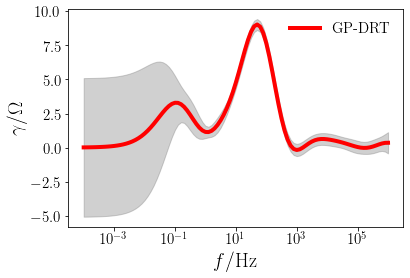

In [86]:
# plot the DRT and its confidence region
plt.semilogx(freq_vec_star, gamma_vec_star, linewidth=4, color="red", label="GP-DRT")
plt.fill_between(freq_vec_star, gamma_vec_star-3*np.sqrt(abs(Sigma_gamma_vec_star)), gamma_vec_star+3*np.sqrt(abs(Sigma_gamma_vec_star)), color="0.4", alpha=0.3)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
#plt.axis([1E-4,1E6,-0.01,0.025])
#plt.yticks(np.arange(-0.01, 0.025, 0.01))
plt.legend(frameon=False, fontsize = 15)
plt.xlabel(r'$f/{\rm Hz}$', fontsize = 20)
plt.ylabel(r'$\gamma/\Omega$', fontsize = 20)
plt.show()

3.290293902449527
9.03829136929204
0.6285083182838775


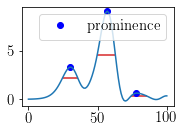

In [92]:
#Find peak tops

import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, peak_widths

x = gamma_vec_star
peaks, _ = find_peaks(x, distance=20)
peaks2, _ = find_peaks(x, prominence=0.5)      # BEST!
results_full = peak_widths(x, peaks2, rel_height=0.5)

#plt.subplot(2, 2, 1)
#plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
plt.hlines(*results_full[1:], color="C3")



-1.0
1.7000000000000002
3.8000000000000007


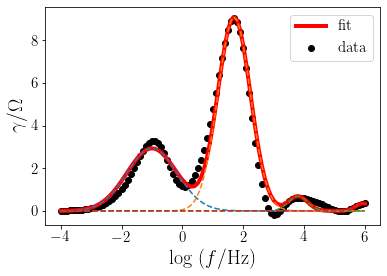

In [100]:
#Fit peaks

from lmfit.models import GaussianModel
amp1 = 1
cen1 = 1
sigma1 = 0.05

#df=pd.DataFrame(index=np.linspace(0,10,num=1000),columns=['int'])

x = np.log10((freq_vec_star))
y = gamma_vec_star

print(x[peaks2[0]])
print(x[peaks2[1]])
print(x[peaks2[2]])


logpeak1 = x[peaks2[0]]
logpeak2 = x[peaks2[1]]
logpeak3 = x[peaks2[2]]
logpeak4 = logpeak3 + 0.5

def _ngaussian(x, amps,cens,sigmas):
    fn = 0
    if len(amps)== len(cens)== len(sigmas):
        for i in range(len(amps)):
            fn = fn+amps[i]*(1/(sigmas[i]*(np.sqrt(2*np.pi))))*\
            (np.exp((-1.0/2.0)*(((x-cens[i])/sigmas[i])**2)))
            fn = fn+np.random.normal(size=len(x), scale=0.05)
    else:
        print('Your inputs have unequal lengths')
    return fn

amps = [1.30, 0.92, 2.11, 1]
cens = [logpeak1, logpeak2, logpeak3, logpeak4]
sigmas=[0.05, 0.09, 0.07, 0.1]

popt_peaks = [amps,cens,sigmas]
y1 = _ngaussian(x, *popt_peaks)

# create a model with 3 Gaussians: pretty easy to generalize
# to a loop to make N peaks
model = (GaussianModel(prefix='p1_') +
        GaussianModel(prefix='p2_') +
         GaussianModel(prefix='p3_') +
        GaussianModel(prefix='p4_') )

# create Parameters (named from function arguments). For
# Gaussian, Lorentzian, Voigt, etc these are "center", "amplitude", "sigma"
params = model.make_params(p1_center=logpeak1, p1_amplitude=8, p1_sigma=1,
                           p2_center=logpeak2, p2_amplitude=8, p2_sigma=1,
                           p3_center=logpeak3, p3_amplitude=8, p3_sigma=1,
                           p4_center=logpeak4, p4_amplitude=8, p4_sigma=1)

# Parameters can have min/max bounds, be fixed (`.vary = False`)
# or constrained to a mathematical expression of other Parameter values
params['p1_center'].vary = False
#params['p1_amplitude'].vary = False
#params['p1_sigma'].vary = False

params['p2_center'].vary = False
#params['p2_amplitude'].vary = False
#params['p2_sigma'].vary = False

params['p3_center'].vary = False
#params['p3_amplitude'].vary = False
#params['p3_sigma'].vary = False

#params['p4_center'].vary = False

# run the fit
result = model.fit(y, params, x=x)

# print out the fit results
#print(result.fit_report())
components = result.eval_components(x=x)

# plot results
plt.scatter(x, y, color = 'black', label='data')
plt.plot(x, result.best_fit, '-', color = 'red', linewidth='4', label='fit')

plt.plot(x, components['p1_'], '--')
plt.plot(x, components['p2_'], '--')
plt.plot(x, components['p3_'], '--')
plt.plot(x, components['p4_'], '--')

plt.xlabel(r'log ($f/{\rm Hz}$)', fontsize = 20)
plt.ylabel(r'$\gamma/\Omega$', fontsize = 20)



plt.legend()
#plt.xscale('log')
plt.show()

In [110]:
#Find peak areas and also Zre

#print(result.params['p1_amplitude'].value)
#print(result.fit_report())

#_ngaussian(x, result.params['p1_amplitude'].value,result.params['p1_center'].value,result.params['p1_sigma'].value)

#
minx= x.min()
maxx=x.max()

df2 = pd.DataFrame()
xseries = np.linspace(minx, maxx, 1000)
df2['xseries'] = xseries

#model Gaussian function fitted from above

gaussian1 = result.params['p1_height'].value*np.exp(-(df2.xseries-result.params['p1_center'].value)**2/(2*result.params['p1_sigma'].value**2))
gaussian2 = result.params['p2_height'].value*np.exp(-(df2.xseries-result.params['p2_center'].value)**2/(2*result.params['p2_sigma'].value**2))
gaussian3 = result.params['p3_height'].value*np.exp(-(df2.xseries-result.params['p3_center'].value)**2/(2*result.params['p3_sigma'].value**2))
gaussian4 = result.params['p4_height'].value*np.exp(-(df2.xseries-result.params['p4_center'].value)**2/(2*result.params['p4_sigma'].value**2))


df2['g1'] = gaussian1
df2['g2'] = gaussian2
df2['g3'] = gaussian3
df2['g4'] = gaussian4

p1_peakheight1 = df2['g1'].max()
p2_peakheight1 = df2['g2'].max()
p3_peakheight1 = df2['g3'].max()
p4_peakheight1 = df2['g4'].max()

max_freq_p1x = df2['xseries'].loc[df2['g1'] == p1_peakheight1]
max_freq_p1ax = max_freq_p1x.values[0]
max_freq_p2x = df2['xseries'].loc[df2['g2'] == p2_peakheight1]
max_freq_p2ax = max_freq_p2x.values[0]
max_freq_p3x = df2['xseries'].loc[df2['g3'] == p3_peakheight1]
max_freq_p3ax = max_freq_p3x.values[0]
max_freq_p4x = df2['xseries'].loc[df2['g4'] == p4_peakheight1]
max_freq_p4ax = max_freq_p4x.values[0]

#Multiply Gaussian by fraction in eq. 11a 10.1016/j.electacta.2019.135316 - for the purpose of integrating to get Zre

df2['g1i'] = df2['g1']*(1/(1+(2*np.pi)**2))
df2['g2i'] = df2['g2']*(1/(1+(2*np.pi)**2))
df2['g3i'] = df2['g3']*(1/(1+(2*np.pi)**2))
df2['g4i'] = df2['g4']*(1/(1+(2*np.pi)**2))


#Integrate using trapezium rule

df2['g1a'] = (df2['xseries'].shift(-1)-df2['xseries'])*((df2['g1i']+df2['g1i'].shift(-1))/2)
df2['g2a'] = (df2['xseries'].shift(-1)-df2['xseries'])*((df2['g2i']+df2['g2i'].shift(-1))/2)
df2['g3a'] = (df2['xseries'].shift(-1)-df2['xseries'])*((df2['g3i']+df2['g3i'].shift(-1))/2)
df2['g4a'] = (df2['xseries'].shift(-1)-df2['xseries'])*((df2['g4i']+df2['g4i'].shift(-1))/2)

Zre_g1 = df2['g1a'].sum()
Zre_g2 = df2['g2a'].sum()
Zre_g3 = df2['g3a'].sum()
Zre_g4 = df2['g4a'].sum()

#Find corresponding frequency for the peak

p1_peakheight = df2['g1i'].max()
p2_peakheight = df2['g2i'].max()
p3_peakheight = df2['g3i'].max()
p4_peakheight = df2['g4i'].max()


max_freq_p1 = df2['xseries'].loc[df2['g1i'] == p1_peakheight]
max_freq_p1a = max_freq_p1.values[0]
max_freq_p2 = df2['xseries'].loc[df2['g2i'] == p2_peakheight]
max_freq_p2a = max_freq_p2.values[0]
max_freq_p3 = df2['xseries'].loc[df2['g3i'] == p3_peakheight]
max_freq_p3a = max_freq_p3.values[0]
max_freq_p4 = df2['xseries'].loc[df2['g4i'] == p4_peakheight]
max_freq_p4a = max_freq_p4.values[0]


df3 = pd.DataFrame()
df3['freq'] = [np.power(10, max_freq_p1a), np.power(10, max_freq_p2a), np.power(10, max_freq_p3a), np.power(10, max_freq_p4a)]
df3['Zre'] = [Zre_g1,Zre_g2,Zre_g3,Zre_g4]
df3['log freq'] = [max_freq_p1a, max_freq_p2a, max_freq_p3a, max_freq_p4a]
df3['Peak height'] = [p1_peakheight1, p2_peakheight1, p3_peakheight1, p4_peakheight1]
#df3['log freq1'] = [max_freq_p1ax, max_freq_p2ax, max_freq_p3ax, max_freq_p4ax]
#df3['freq_1'] = [np.power(10, max_freq_p1ax), np.power(10, max_freq_p2ax), np.power(10, max_freq_p3ax), np.power(10, max_freq_p4ax)]
df3.sort_values(by=['freq'], inplace=True, ascending=False)

df3

,freq,Zre,log freq,Peak height
3,851000.724712,0.003224,5.929930,0.357147
2,6277.660106,0.013343,3.797798,0.692828
1,49.624449,0.300416,1.695696,9.086719
0,0.100694,0.149794,-0.996997,2.936671


### 4e) Plot the imaginary part of the GP-DRT impedance together with the experimental one

In [ ]:
plt.semilogx(freq_vec, -Z_exp.imag, "o", markersize=10, color="black", label="synth exp")
plt.semilogx(freq_vec_star, -Z_im_vec_star, linewidth=4, color="red", label="GP-DRT")
plt.fill_between(freq_vec_star, -Z_im_vec_star-3*np.sqrt(abs(Sigma_Z_im_vec_star)), -Z_im_vec_star+\
                 3*np.sqrt(abs(Sigma_Z_im_vec_star)), alpha=0.3)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
#plt.axis([1E-3,1E5,-0.01,0.03])
plt.legend(frameon=False, fontsize = 15)
plt.xlabel(r'$f/{\rm Hz}$', fontsize = 20)
plt.ylabel(r'$-Z_{\rm im}/\Omega$', fontsize = 20)
plt.show()